Epoch 0, Loss: 0.1123
Epoch 5, Loss: 0.0434
Epoch 10, Loss: 0.0431
Epoch 15, Loss: 0.0262
Epoch 20, Loss: 0.0193
Epoch 25, Loss: 0.0071
Epoch 30, Loss: 0.0017
Epoch 35, Loss: 0.0021
Epoch 40, Loss: 0.0023
Epoch 45, Loss: 0.0004
Epoch 50, Loss: 0.0003
Epoch 55, Loss: 0.0006

Metrics:
Close >> RMSE: $ 7.7590 R2: 0.9514 MAE: $ 6.2742


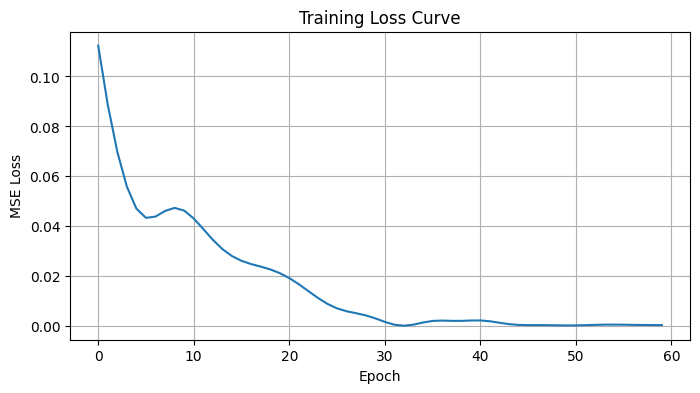

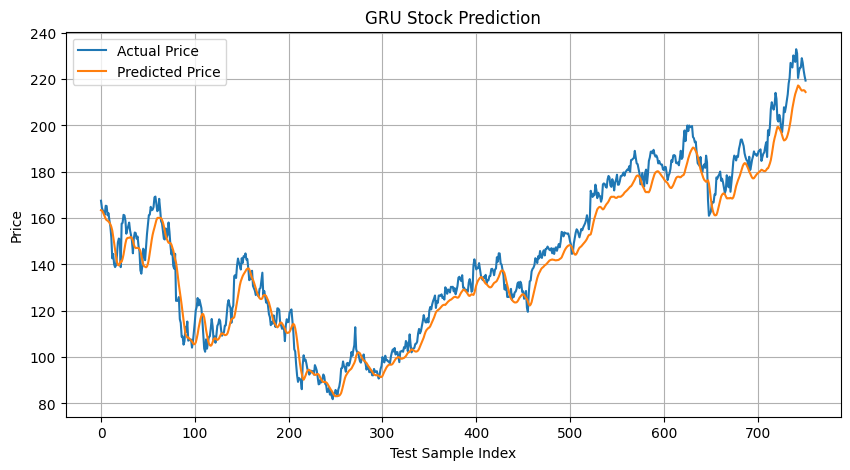

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

########
df = pd.read_csv("AMZN_processed.csv")
prices = df["Close"].values.reshape(-1, 1)

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

########
SEQ_LEN = 10    #Changing this changes dimension(???), makes it fast but drops accuracy
X_list, y_list = [], []

for i in range(len(prices_scaled) - SEQ_LEN):
    X_list.append(prices_scaled[i:i+SEQ_LEN])
    y_list.append(prices_scaled[i+SEQ_LEN])

X = torch.tensor(np.array(X_list), dtype=torch.float32)
y = torch.tensor(np.array(y_list), dtype=torch.float32)

########
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

########
GRU = nn.GRU(1, 64, 2, batch_first=True)
connection_density = nn.Linear(64, 1)

criterion = nn.MSELoss()
#Adam, AdamW, RMSprop, Adamax, SGD... << optimizers
optimizer = torch.optim.AdamW(list(GRU.parameters()) + list(connection_density.parameters()), lr=0.00095) #Need to know about learning rate. What's the best for stock pred?

########
EPOCHS = 60  # More leads to overfitting and less -> underfit
losses = []

for epoch in range(EPOCHS):
    GRU.train()
    connection_density.train()

    optimizer.zero_grad()

    out, _ = GRU(X_train)
    preds = connection_density(out[:, -1, :])

    loss = criterion(preds, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

########
GRU.eval()
connection_density.eval()

out_test, _ = GRU(X_test)
pred_test = connection_density(out_test[:, -1, :]).detach().numpy()

pred_test = scaler.inverse_transform(pred_test)
actual_test = scaler.inverse_transform(y_test.numpy())

mse1 = mean_squared_error(actual_test, pred_test)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(actual_test, pred_test)
mae1 = mean_absolute_error(actual_test, pred_test)

print("\nMetrics:")
print("Close >> RMSE: $", "%.4f" % rmse1, "R2:", "%.4f" % r2_1, "MAE: $", "%.4f" % mae1)

########
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(actual_test, label="Actual Price")
plt.plot(pred_test, label="Predicted Price")
plt.title("GRU Stock Prediction")
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

########
df = pd.read_csv("AMZN_processed.csv")
prices = df["Close"].values.reshape(-1, 1)

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

########
SEQ_LEN = 10    #Changing this changes dimension(???), makes it fast but drops accuracy
X_list, y_list = [], []

for i in range(len(prices_scaled) - SEQ_LEN):
    X_list.append(prices_scaled[i:i+SEQ_LEN])
    y_list.append(prices_scaled[i+SEQ_LEN])

X = torch.tensor(np.array(X_list), dtype=torch.float32)
y = torch.tensor(np.array(y_list), dtype=torch.float32)

########
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

########
GRU = nn.GRU(1, 64, 2, batch_first=True)
connection_density = nn.Linear(64, 1)

criterion = nn.MSELoss()
#Adam, AdamW, RMSprop, Adamax, SGD... << optimizers
optimizer = torch.optim.AdamW(list(GRU.parameters()) + list(connection_density.parameters()), lr=0.00095) #Need to know about learning rate. What's the best for stock pred?

########
EPOCHS = 60  # More leads to overfitting and less -> underfit
losses = []

for epoch in range(EPOCHS):
    GRU.train()
    connection_density.train()

    optimizer.zero_grad()

    out, _ = GRU(X_train)
    preds = connection_density(out[:, -1, :])

    loss = criterion(preds, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

########
GRU.eval()
connection_density.eval()

out_test, _ = GRU(X_test)
pred_test = connection_density(out_test[:, -1, :]).detach().numpy()

pred_test = scaler.inverse_transform(pred_test)
actual_test = scaler.inverse_transform(y_test.numpy())

mse1 = mean_squared_error(actual_test, pred_test)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(actual_test, pred_test)
mae1 = mean_absolute_error(actual_test, pred_test)

print("\nMetrics:")
print("Close >> RMSE: $", "%.4f" % rmse1, "R2:", "%.4f" % r2_1, "MAE: $", "%.4f" % mae1)

########
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(actual_test, label="Actual Price")
plt.plot(pred_test, label="Predicted Price")
plt.title("GRU Stock Prediction")
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
